In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from pathlib import Path

DATA_PROCESSED = Path("../data/processed")
gse_id = "GSE2034"

# Load the 2500 × 2500 distance matrix
dist_matrix = pd.read_parquet(DATA_PROCESSED / f"{gse_id}_distance_matrix.parquet")
print(dist_matrix.shape)

(8073, 8073)


In [2]:
from scipy.spatial.distance import squareform

# Convert 2500×2500 → vector of length ~3 million
dist_vector = squareform(dist_matrix.values, checks=False)


In [3]:
Z = linkage(dist_vector, method="ward")

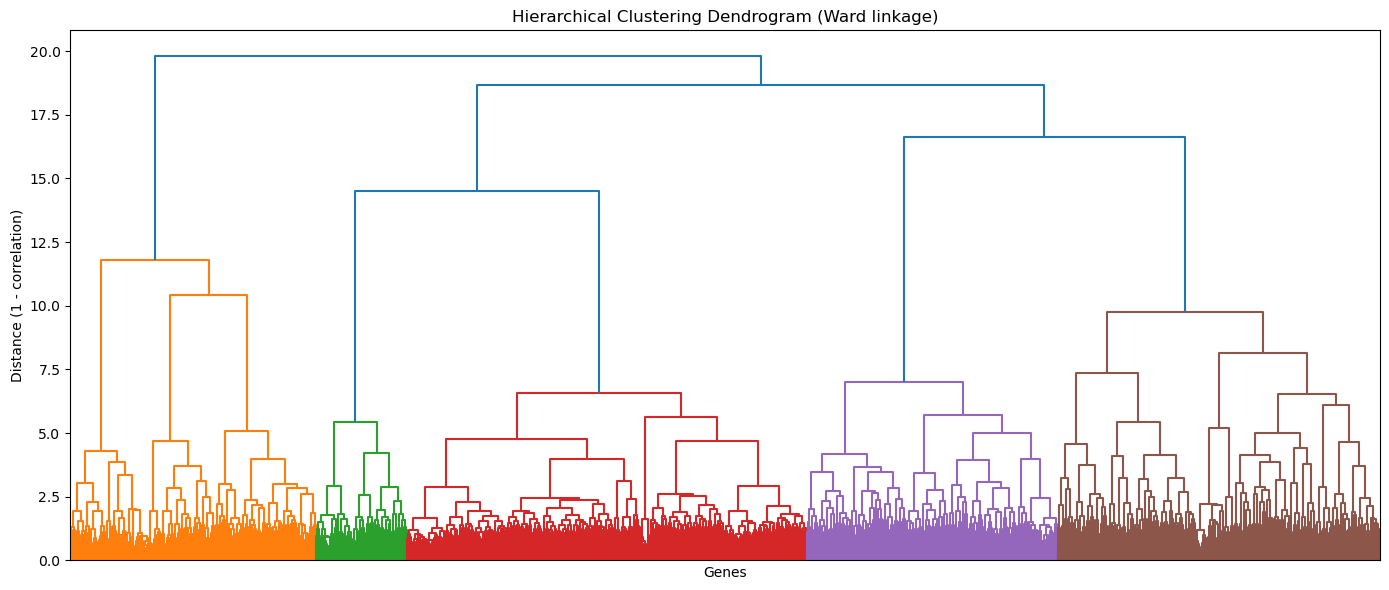

In [4]:
plt.figure(figsize=(14, 6))
dendrogram(
    Z,
    no_labels=True,
    leaf_rotation=90,
    leaf_font_size=6,
    color_threshold=None
)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Genes")
plt.ylabel("Distance (1 - correlation)")
plt.tight_layout()
plt.show()

In [5]:
k = 10   # choose based on dendrogram shape
cluster_labels = fcluster(Z, k, criterion="maxclust")

pd.Series(cluster_labels).value_counts()

5     2464
6     1546
10     899
3      623
4      562
8      538
1      485
2      407
7      315
9      234
Name: count, dtype: int64

c:\Users\kusha\.conda\envs\bio-mllab\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\kusha\.conda\envs\bio-mllab\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\kusha\.conda\envs\bio-mllab\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\kusha\.conda\envs\bio-mllab\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


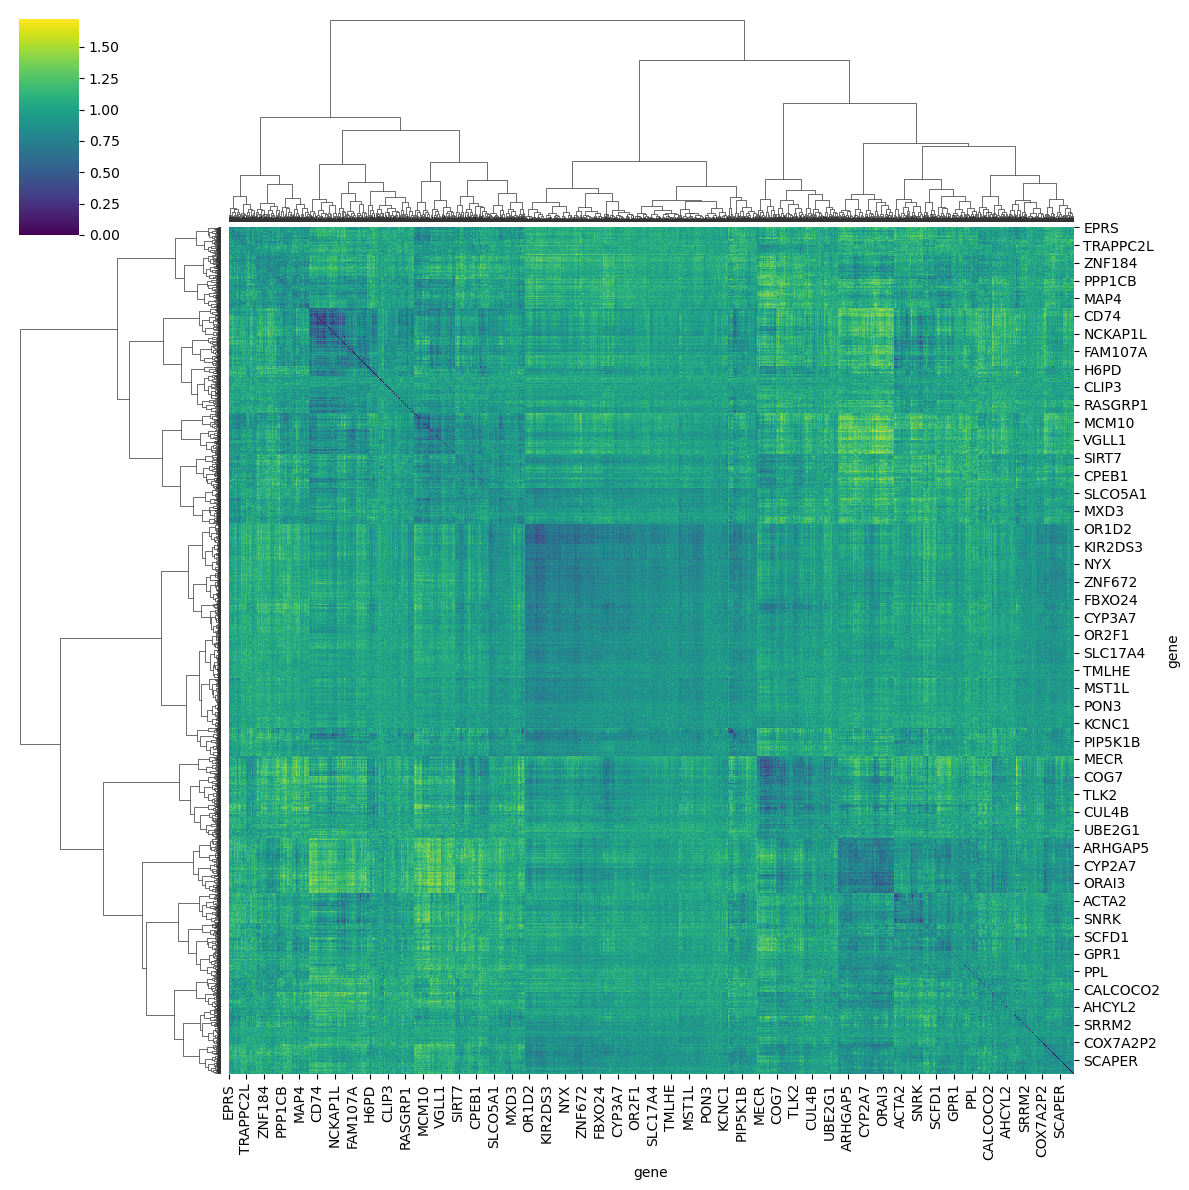

In [6]:
sns.clustermap(
    dist_matrix,
    method="ward",
    cmap="viridis",
    figsize=(12, 12)
)